### Importing data

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from ipywidgets import interact
import ipywidgets as widgets
from tensorflow import keras
from tensorflow.keras import layers

In [9]:
df = pd.read_csv(r'C:\Users\Jason Lai\Desktop\Programming Fundamental\err\industry_processing\ai4i2020.csv')

In [10]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [19]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [12]:
df['Air temperature [K]'].value_counts()
df['Process temperature [K]'].value_counts()

Process temperature [K]
310.6    317
310.8    273
310.7    266
308.6    265
310.5    263
        ... 
306.9      4
313.7      4
305.8      3
305.7      2
313.8      2
Name: count, Length: 82, dtype: int64

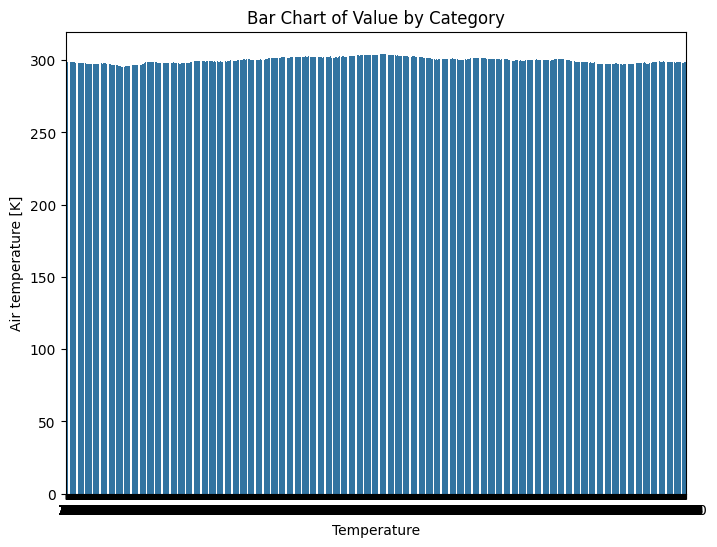

In [13]:
#Temperature

plt.figure(figsize=(8, 6))
sns.barplot(x='UDI', y='Air temperature [K]', data=df)
plt.title('Bar Chart of Value by Category')
plt.xlabel('Temperature')
plt.show()

### Fitting of data

In [20]:
X = df[['Air temperature [K]','Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]','Tool wear [min]']]
y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
input_shape = X_train.shape

### CNN Testing

In [23]:
# Random forest
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier()
rfModel.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rfModel.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1939
           1       0.84      0.61      0.70        61

    accuracy                           0.98      2000
   macro avg       0.91      0.80      0.85      2000
weighted avg       0.98      0.98      0.98      2000



In [25]:
importances = rfModel.feature_importances_
print(importances)

[0.15901526 0.1466277  0.23012438 0.3015087  0.16272397]


In [26]:
X_train.columns

Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]'],
      dtype='object')

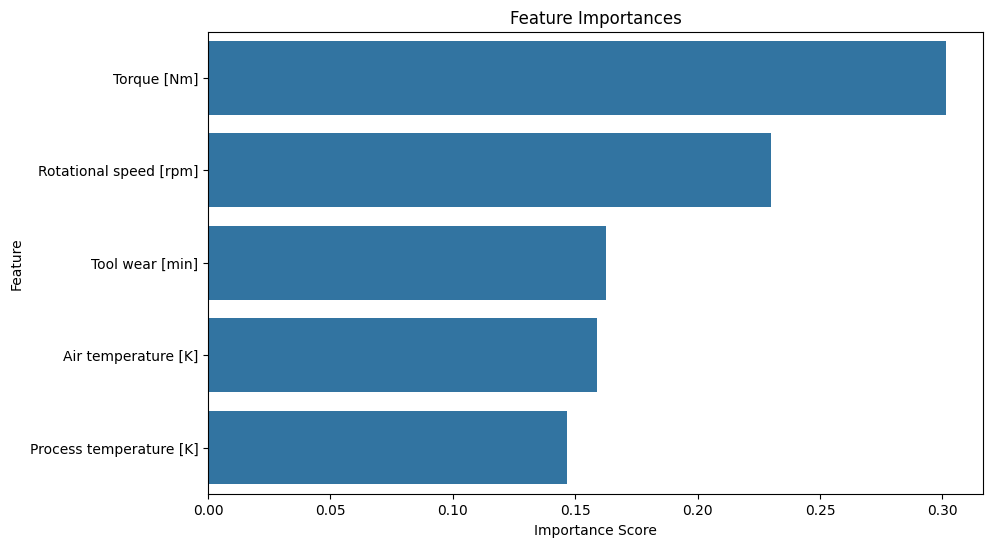

In [27]:
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
